<a href="https://colab.research.google.com/github/Andrade-Douglas/Data-Science/blob/master/Machine_Learning_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

# **Machine Learning - KNN**

Importando as bibliotecas

In [0]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
!pip install mlxtend

Carregando Base de Dados

In [0]:
wine = datasets.load_wine()

Criando o Dataframe

In [0]:
df_wine = pd.DataFrame(data=wine.data, columns=wine.feature_names)

In [0]:
df_wine['class'] = wine.target

Veriricando dos dados

In [10]:
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


Informações da Base de Dados

In [11]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
class                           178 non-null int64
dtypes: float64(13), int64(1)
memory usage: 19.5 KB


In [12]:
df_wine['class'].value_counts()

1    71
0    59
2    48
Name: class, dtype: int64

Separando os dados de treino e teste

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df_wine.drop('class', axis=1), df_wine['class'], test_size=0.3)

In [20]:
X_train.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
137,12.53,5.51,2.64,25.0,96.0,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515.0
96,11.81,2.12,2.74,21.5,134.0,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625.0
144,12.25,3.88,2.20,18.5,112.0,1.38,0.78,0.29,1.14,8.21,0.65,2.00,855.0


In [21]:
X_test.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
55,13.56,1.73,2.46,20.5,116.0,2.96,2.78,0.2,2.45,6.25,0.98,3.03,1120.0
160,12.36,3.83,2.38,21.0,88.0,2.30,0.92,0.5,1.04,7.65,0.56,1.58,520.0
142,13.52,3.17,2.72,23.5,97.0,1.55,0.52,0.5,0.55,4.35,0.89,2.06,520.0


In [23]:
y_train.head(3)

137    2
96     1
144    2
Name: class, dtype: int64

In [24]:
y_test.head(3)

55     0
160    2
142    2
Name: class, dtype: int64

Instanciando o Classificador

In [0]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors, número de vizinhos

In [0]:
knn = KNeighborsClassifier(n_neighbors=1)

Treinando o algorismo com os dados de treinamento

In [26]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Executando o KNN com o conjunto de teste

In [29]:
resultado = knn.predict(X_test)
resultado

array([0, 2, 2, 2, 1, 1, 2, 0, 0, 1, 1, 0, 2, 1, 1, 0, 2, 0, 1, 1, 1, 2,
       1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 2, 2, 1, 2, 0, 2, 0, 1, 2, 0, 0,
       0, 0, 0, 0, 1, 0, 2, 2, 2, 1])

Tecnica de Validação

In [32]:
print(pd.crosstab(y_test, resultado, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1   2  All
Real                    
0        15   1   2   18
1         1  14   5   20
2         1   5  10   16
All      17  20  17   54


Métrica de Classificação

In [33]:
from sklearn import metrics
print(metrics.classification_report(y_test, resultado, target_names=wine.target_names))

              precision    recall  f1-score   support

     class_0       0.88      0.83      0.86        18
     class_1       0.70      0.70      0.70        20
     class_2       0.59      0.62      0.61        16

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.73      0.72      0.72        54



Otimizando o parametro K utilizando GridSearch

In [0]:
from sklearn.model_selection import GridSearchCV

Definindo a lista de valores para os parametros

In [0]:
k_list = list(range(1,31))
weight_list = ['uniform', 'distance']
p_list = [1,2]

In [0]:
parametros = dict(n_neighbors=k_list, weights=weight_list, p=p_list)    

In [37]:
parametros

{'n_neighbors': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 'p': [1, 2],
 'weights': ['uniform', 'distance']}

Instânciando o objeto GridSearch

In [0]:
grid = GridSearchCV(knn, parametros, cv=5, scoring='accuracy')

Treinando o objeto

In [39]:
grid.fit(df_wine.drop('class',axis=1),df_wine['class'])

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=1, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Verificando os valores de scores¶

In [40]:
grid.cv_results_

{'mean_fit_time': array([0.00237942, 0.00194001, 0.00177188, 0.00171204, 0.00172343,
        0.00170593, 0.00181494, 0.00173039, 0.0017314 , 0.00171828,
        0.00171266, 0.00175176, 0.00183496, 0.00172734, 0.0017478 ,
        0.00173788, 0.00170183, 0.00176783, 0.00171261, 0.00172534,
        0.00173087, 0.00173306, 0.00175052, 0.00172119, 0.00171556,
        0.00172977, 0.00171123, 0.00187445, 0.0017354 , 0.00170789,
        0.00170655, 0.00171471, 0.00204344, 0.00169721, 0.00171118,
        0.00172048, 0.00170817, 0.00174069, 0.00171404, 0.0017446 ,
        0.00169883, 0.00171165, 0.00174046, 0.001723  , 0.00171838,
        0.00173163, 0.0017189 , 0.00174189, 0.00187612, 0.0018539 ,
        0.00186262, 0.00179143, 0.00175009, 0.00175643, 0.00173302,
        0.00172997, 0.00180788, 0.00175037, 0.00177474, 0.00173516,
        0.00172029, 0.00171876, 0.00172858, 0.00173025, 0.00172653,
        0.00172243, 0.00171113, 0.00172086, 0.00176191, 0.00172458,
        0.00172219, 0.00171218,

In [45]:
print('Melhores parametros {} com o valor de acurácia {}'.format(grid.best_estimator_,grid.best_estimator_))

Melhores parametros KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=1,
                     weights='uniform') com o valor de acurácia KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=1,
                     weights='uniform')


In [0]:
scores = grid.cv_results_.get('mean_test_score')

In [0]:
k_rank = grid.cv_results_.get('rank_test_score')

In [43]:
print("Melhores parametros {} com o valor de acurácia {} ".format(grid.best_params_,grid.best_score_))

Melhores parametros {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'} com o valor de acurácia 0.8089887640449438 


## **Visualizando as fronteiras de complexidade**

Selecionando os dados

In [0]:
X = wine.data[:,[0,2]]
y = wine.target

Função para plot de fronteiras de acordo com o número de vizinhos

In [0]:
from mlxtend.plotting import plot_decision_regions

def plot_fronteiras(n_vizinhos):
    knn = KNeighborsClassifier(n_neighbors=n_vizinhos)
    knn.fit(X, y)
    plt.figure(figsize=(8,5))
    plot_decision_regions(X,y,clf=knn,legend=2)
    plt.xlabel('alcohol')
    plt.ylabel('malic_acid')
    plt.title('Fronteiras de Complexidade - KNN')

Valor de K=1

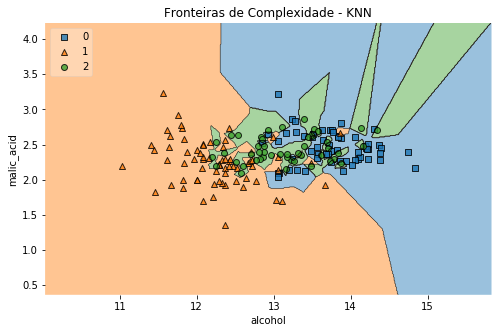

In [59]:
plot_fronteiras(1)

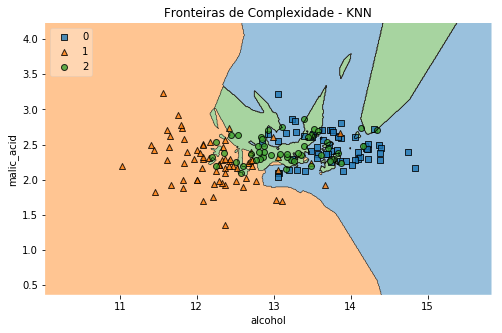

In [60]:
plot_fronteiras(3)

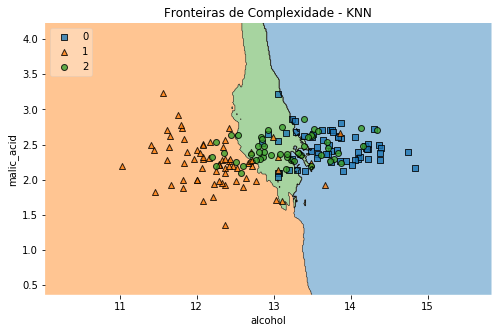

In [61]:
plot_fronteiras(30)